## Imports

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree
from sklearn.model_selection import train_test_split

sb.set(style="whitegrid")

## Train

In [19]:
train_set = pd.read_csv('train/train_encoded.csv')
train_set.head(10)

,len_location,len_keyword,len_text,len_text_original,diff_len_text,keyword_value_sin_stemming,keyword_value_con_stemming,keyword_value_mult,keyword_value_diff,keyword_sum,...,text_norm_value_2_gram,text_value_3_gram,text_norm_value_3_gram,text_value_4_gram,text_norm_value_4_gram,text_value_mult,text_value_diff,text_norm_value_mult,text_norm_value_diff,target
0,0,0,43,69,26,3.267254,0.03008,0.098278,3.237175,1.0,...,0.039129,0.0,0.0,0.0,0.0,6.328488,27.200895,1.034131,12.431300,1
1,0,0,36,38,2,3.267254,0.03008,0.098278,3.237175,1.0,...,0.039828,0.0,0.0,0.0,0.0,2.183374,14.948923,0.482472,7.746799,1
2,0,0,72,133,61,3.267254,0.03008,0.098278,3.237175,1.0,...,0.058736,0.0,0.0,0.0,0.0,15.902513,50.867533,2.458198,21.204076,1
3,0,0,50,65,15,3.267254,0.03008,0.098278,3.237175,1.0,...,0.040829,0.0,0.0,0.0,0.0,4.867260,24.192476,0.804374,11.435785,1
4,0,0,52,88,36,3.267254,0.03008,0.098278,3.237175,1.0,...,0.000000,0.0,0.0,0.0,0.0,9.930953,38.388048,1.239480,15.629609,1
5,0,0,84,110,26,3.267254,0.03008,0.098278,3.237175,1.0,...,0.048779,0.0,0.0,0.0,0.0,14.091701,36.979880,1.732342,15.621549,1
6,0,0,74,95,21,3.267254,0.03008,0.098278,3.237175,1.0,...,0.056748,0.0,0.0,0.0,0.0,10.891867,34.133985,1.789968,16.191501,1
7,0,0,21,59,38,3.267254,0.03008,0.098278,3.237175,1.0,...,0.030275,0.0,0.0,0.0,0.0,4.093972,26.802238,0.806041,12.256102,1
8,0,0,38,79,41,3.267254,0.03008,0.098278,3.237175,1.0,...,0.028947,0.0,0.0,0.0,0.0,4.706527,27.632688,0.961200,13.417604,1
9,0,0,24,52,28,3.267254,0.03008,0.098278,3.237175,1.0,...,0.000000,0.0,0.0,0.0,0.0,2.697300,22.948983,0.702365,11.044126,1


### Random Forest

In [20]:
X, y = train_set.iloc[:,:-1],train_set.iloc[:,-1]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Random Search

In [5]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [20, 50, 70, 100]
max_features = ['auto', 'log2']
max_depth = [20, 50, 70]
min_samples_split = [5, 50, 100]
min_samples_leaf = [20]

random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [6]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),\
                               param_distributions=random_search, n_iter=30, cv=7, random_state=111)

In [7]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [20, 50, 70],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [20],
                                        'min_samples_split': [5, 50, 100],
                                        'n_estimators': [20, 50, 70, 100]},
                   random_state=111)

In [8]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 20,
 'max_features': 'log2',
 'max_depth': 50}

In [9]:
preds = rf_random.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score %f" % (f1))

F1-Mean Score 0.797211


## Pruebas manuales

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=20, max_depth=70, max_features='log2')
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.802235


In [32]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=50, min_samples_leaf=20, max_depth=20)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.801558


In [33]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.799538


In [34]:
rf_model = RandomForestClassifier(n_estimators=70, min_samples_split=50, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.799377


In [35]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=70, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.802008


In [36]:
rf_model = RandomForestClassifier(n_estimators=60, min_samples_split=4, max_depth=37, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.805499


In [37]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=30, min_samples_leaf=5, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.803287


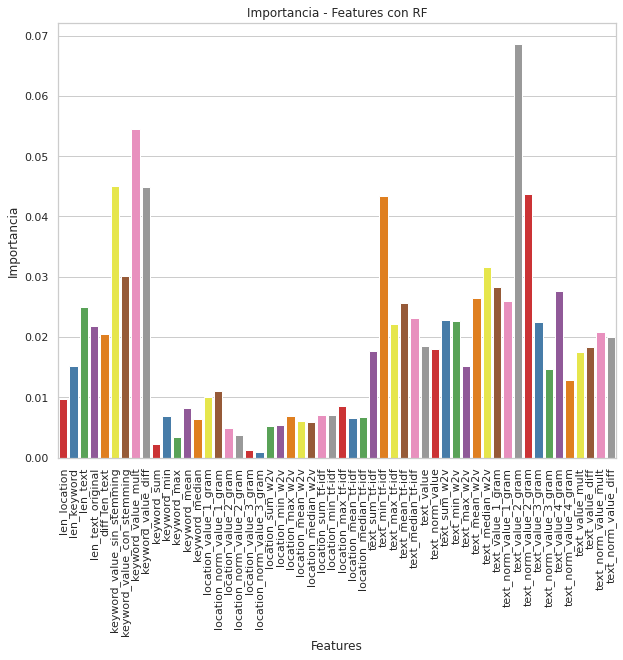

In [39]:
plt.figure(figsize=(10, 8))
sb.barplot(x=X_train.columns, y=rf_model.feature_importances_, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()

## Random Search 2

In [24]:
n_estimators = [15, 20, 60]
max_features = ['auto', 'log2']
max_depth = [5, 15, 30]
min_samples_split = [5, 25, 50]
min_samples_leaf = [5, 20, 30]

random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [25]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),\
                               param_distributions=random_search, n_iter=30, cv=7, random_state=47)

In [26]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [5, 15, 30],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [5, 20, 30],
                                        'min_samples_split': [5, 25, 50],
                                        'n_estimators': [15, 20, 60]},
                   random_state=47)

In [27]:
rf_random.best_params_

{'n_estimators': 60,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 30}

In [28]:
preds = rf_random.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score %f" % (f1))

F1-Mean Score 0.807573


In [29]:
rf_model = RandomForestClassifier(n_estimators=60, min_samples_split=5, min_samples_leaf=5, max_depth=30, max_features='log2', random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.810984


### Test

In [76]:
test_set = pd.read_csv('test/test_encoded.csv')

In [77]:
col_id = test_set['id']
test_set.drop('id', axis=1, inplace=True)

In [78]:
test_set.head(10)

,len_keyword,len_location,len_text,len_text_original,diff_len_text,keyword_sum,keyword_min,keyword_max,keyword_mean,keyword_median,...,text_sum_tf-idf,text_min_tf-idf,text_max_tf-idf,text_mean_tf-idf,text_median_tf-idf,text_sum_w2v,text_min_w2v,text_max_w2v,text_mean_w2v,text_median_w2v
0,0.0,0.0,34,34,0,1.0,1.0,1.0,1.0,1.0,...,2.350852,0.188729,0.539327,0.391809,0.405420,2.615612,0.123642,0.416246,0.261561,0.253108
1,0.0,0.0,62,64,2,1.0,1.0,1.0,1.0,1.0,...,2.907499,0.134557,0.424909,0.323055,0.335907,4.601476,0.020386,0.308944,0.127819,0.103810
2,0.0,0.0,94,96,2,1.0,1.0,1.0,1.0,1.0,...,3.829908,0.087343,0.366435,0.212773,0.202162,18.687548,-0.060702,0.536185,0.122141,0.104698
3,0.0,0.0,38,40,2,1.0,1.0,1.0,1.0,1.0,...,1.977999,0.387866,0.583183,0.494500,0.503475,0.390538,0.065934,0.175728,0.130179,0.148877
4,0.0,0.0,45,45,0,1.0,1.0,1.0,1.0,1.0,...,2.676265,0.145303,0.467023,0.334533,0.357812,0.780736,-0.023094,0.283668,0.078074,0.060852
5,0.0,0.0,36,34,-2,1.0,1.0,1.0,1.0,1.0,...,2.433109,0.184247,0.661802,0.347587,0.311464,3.261046,-0.091945,0.536185,0.155288,0.093425
6,0.0,0.0,73,72,-1,1.0,1.0,1.0,1.0,1.0,...,3.780986,0.177587,0.639809,0.290845,0.219339,15.150403,-0.038854,1.000000,0.194236,0.143367
7,0.0,0.0,15,17,2,1.0,1.0,1.0,1.0,1.0,...,1.908290,0.351061,0.726570,0.477073,0.415329,1.542290,0.097143,0.555028,0.257048,0.215696
8,0.0,0.0,15,16,1,1.0,1.0,1.0,1.0,1.0,...,1.884570,0.223933,0.653736,0.471142,0.503450,0.549909,0.086593,0.273800,0.183303,0.189516
9,0.0,0.0,8,9,1,1.0,1.0,1.0,1.0,1.0,...,1.406949,0.631894,0.775055,0.703474,0.703474,0.164787,0.164787,0.164787,0.164787,0.164787


# PROBAR CON BEST_PARAMS

In [79]:
preds = rf_model.predict(test_set)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
print(len(preds))
test_set['target'] = preds
test_set['id'] = col_id
test_set[['id', 'target']]

3263


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


### Resultado

In [81]:
test_set[['id', 'target']].to_csv('result_rf_encoded.csv', header=True, index=False)

## Text w2v

## Train

In [2]:
train_set = pd.read_csv('train/text_encoded_w2v.csv')
train_set.head(10)

,id,text_sum,text_min,text_max,text_mean,text_median,target
0,1,1.100006,0.004267,0.261477,0.110001,0.108159,1
1,4,1.312549,-0.103024,0.308946,0.087503,0.093828,1
2,5,6.537887,-0.029605,1.000000,0.145286,0.099503,1
3,6,1.225229,0.001371,0.300471,0.122523,0.077621,1
4,7,2.055524,-0.059800,0.332519,0.097882,0.074613,1
5,8,1.770825,-0.060205,0.273306,0.049190,0.040129,1
6,10,5.151926,-0.028055,1.000000,0.143109,0.098941,1
7,13,0.790631,-0.039936,0.178667,0.079063,0.080440,1
8,14,1.052949,-0.027161,0.223943,0.105295,0.103054,1
9,15,0.775155,0.025716,0.260719,0.129193,0.106400,1


In [17]:
train_set.drop('id', axis=1, inplace=True)

### Random Forest

In [18]:
X, y = train_set.iloc[:,:-1],train_set.iloc[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [20, 50, 70, 100]
max_features = ['auto'] #'log2'
max_depth = [20, 50, 70]
min_samples_split = [5, 50, 100]
min_samples_leaf = [20]

random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [21]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),\
                               param_distributions=random_search, n_iter=30, cv=7, random_state=111)

In [22]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [20, 50, 70],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [20],
                                        'min_samples_split': [5, 50, 100],
                                        'n_estimators': [20, 50, 70, 100]},
                   random_state=111)

In [23]:
rf_random.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 20,
 'max_features': 'auto',
 'max_depth': 70}

In [24]:
preds = rf_random.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score %f" % (f1))

F1-Mean Score 0.695411


In [25]:
rf_model = RandomForestClassifier(n_estimators=70, min_samples_split=50, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.697627


In [26]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.691294


In [27]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=50, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.686626


In [28]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=70, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.718371


In [29]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=30, min_samples_leaf=5, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.712376


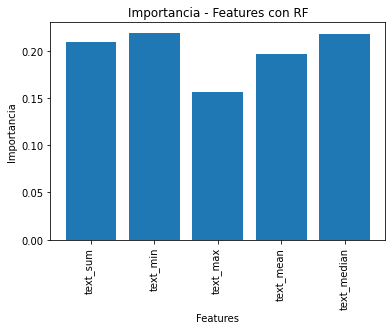

In [30]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()